# 머신러닝 Assignment 1

- 학번 : 202055623
- 이름 : 허치영

## 라이브러리 불러오기

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns

# sklearn패키지와 관련된 futurewarning을 무시합니다.
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


## UCI Data 가져오기

- UCI data 중 Iris Data Set을 선택했습니다.
- feature는 sepal length, sepal width, petal length, petal width로 총 4개입니다.
- target은 setosa, versicolor, virginica로 총 3개입니다.

In [11]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
iris = fetch_ucirepo('iris')

# data (as pandas dataframes)
X = iris.data.features
y = iris.data.targets

In [12]:
# metadata
display(iris.metadata)

# variable information
display(iris.variables)

{'uci_id': 53,
 'name': 'Iris',
 'repository_url': 'https://archive.ics.uci.edu/dataset/53/iris',
 'data_url': 'https://archive.ics.uci.edu/static/public/53/data.csv',
 'abstract': 'A small classic dataset from Fisher, 1936. One of the earliest known datasets used for evaluating classification methods.\n',
 'area': 'Biology',
 'tasks': ['Classification'],
 'characteristics': ['Tabular'],
 'num_instances': 150,
 'num_features': 4,
 'feature_types': ['Real'],
 'demographics': [],
 'target_col': ['class'],
 'index_col': None,
 'has_missing_values': 'no',
 'missing_values_symbol': None,
 'year_of_dataset_creation': 1936,
 'last_updated': 'Tue Sep 12 2023',
 'dataset_doi': '10.24432/C56C76',
 'creators': ['R. A. Fisher'],
 'intro_paper': {'title': 'The Iris data set: In search of the source of virginica',
  'authors': 'A. Unwin, K. Kleinman',
  'published_in': 'Significance, 2021',
  'year': 2021,
  'url': 'https://www.semanticscholar.org/paper/4599862ea877863669a6a8e63a3c707a787d5d7e',
  '

,name,role,type,demographic,description,units,missing_values
0,sepal length,Feature,Continuous,None,None,cm,no
1,sepal width,Feature,Continuous,None,None,cm,no
2,petal length,Feature,Continuous,None,None,cm,no
3,petal width,Feature,Continuous,None,None,cm,no
4,class,Target,Categorical,None,"class of iris plant: Iris Setosa, Iris Versico...",None,no


array([[<Axes: title={'center': 'sepal length'}>,
        <Axes: title={'center': 'sepal width'}>],
       [<Axes: title={'center': 'petal length'}>,
        <Axes: title={'center': 'petal width'}>]], dtype=object)

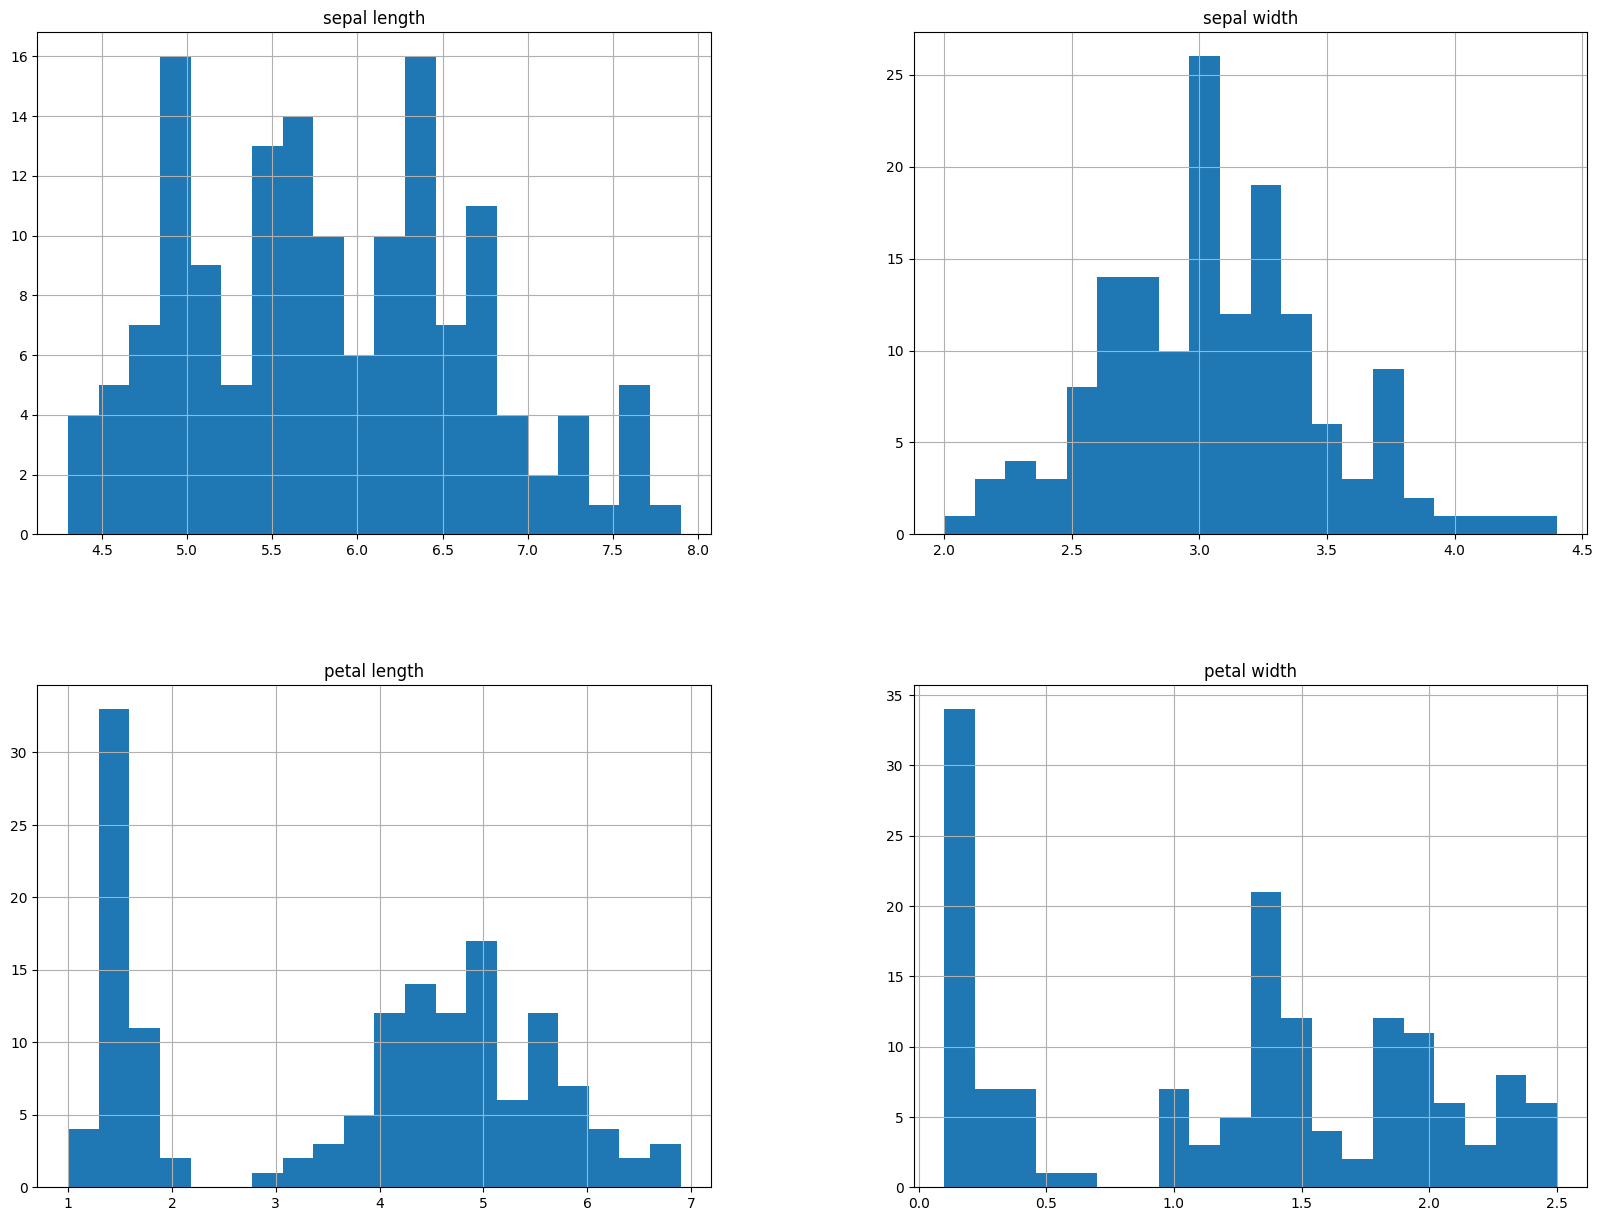

In [13]:
X.hist(bins=20, figsize=(20,15))

## 문제정의

- target이 categorical variable이므로, classification 문제로 정의할 수 있습니다.
- Iris의 물리적인 특징을 통해 target을 예측하는 문제입니다.

## 데이터 전처리

- y값을 label encoding합니다.

In [14]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y['class'])

print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


- `StandardScaler`를 사용하여 feature scaling을 진행하겠습니다.

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# StandardScaler instance
scaler = StandardScaler()

# X_train에 대해 fit() 메서드를 호출하여 평균과 표준편차 계산
scaler.fit(X_train)

# X_train과 X_test data transform
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

- data leakage를 방지하기 위해 train data set에서 계산하여 test data set에 적용했습니다.

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# RandomForestClassifier 생성
clf = RandomForestClassifier(n_estimators=100, random_state=0)

# GirdSearchCV를 위한 parameter grid
param_grid = {
    'max_depth': [None, 3, 5],
    'min_samples_split': [2, 5, 10],
}

# GridSearchCV 를 이용하여 최적의 hyperparameter 찾기
# cv=5로 설정하여 5-fold cross-validation 수행
# scoring='f1_macro'로 설정하여 f1 score를 기준으로 hyperparameter 탐색
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='f1_macro')

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [None, 3, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring='f1_macro')

In [17]:
from sklearn.metrics import classification_report
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.3f}".format(grid_search.best_score_))
print("Best estimator:\n{}".format(grid_search.best_estimator_))

# best model
best_forest = grid_search.best_estimator_

# test data에 대해 predict
y_pred = best_forest.predict(X_test)


print(classification_report(y_test, y_pred, target_names=iris.data.target_names))

Best parameters: {'max_depth': None, 'min_samples_split': 5}
Best cross-validation score: 0.957
Best estimator:
RandomForestClassifier(min_samples_split=5, random_state=0)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## 결과 해석

- `precision` :
    - 정밀도
    - TP / (TP + FP)
    - 모델이 True라고 예측한 것 중 실제 True인 것의 비율
- `recall` :
    - 재현율
    - TP / (TP + FN)
    - 실제 True 중 모델이 True라고 예측한 것의 비율
- `f1-score` :
    - 정밀도와 재현율의 조화평균
    - 2 * (precision * recall) / (precision + recall)
- `support` :
    - 실제 데이터의 갯수
- `accuracy` :
    - 정확도
    - (TP + TN) / (TP + TN + FP + FN)
    - 전체 데이터 중 모델이 맞춘 데이터의 비율
- `macro avg` :
    - 각 클래스의 metric을 독립적으로 계산한 후의 평균
- `weighted avg` :
    - 각 클래스의 `support`를 가중치로한 평균

학습 단계에서는 `f1_macro`를 사용하여 학습을 진행하였습니다.

f1_macro는 각 클래스의 f1-score를 계산한 후의 평균입니다.

단순한 accuracy보다, precision과 recall을 모두 고려하기 위해 f1-score를 사용하였고, 각 클래스의 중요도가 동일하다고 가정하여 f1_macro를 사용하였습니다.
